# sklearn学习笔记
## 特征工程


In [4]:
from sklearn.preprocessing import MinMaxScaler
 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
 

import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [6]:
 
#实现归一化
scaler = MinMaxScaler()                             #实例化
scaler = scaler.fit(data)                           #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data)                     #通过接口导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [7]:
result_ = scaler.fit_transform(data)                #训练和导出结果一步达成
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [12]:
scaler.inverse_transform(result) 
result 
#将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [13]:
 
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5,10])         #依然实例化
result = scaler.fit_transform(data)                 #fit_transform一步导出结果
result
 
#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [14]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
 
#归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [20]:
#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [32]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [33]:
 
scaler = StandardScaler()                           #实例化
scaler.fit(data)                                    #fit，本质是生成均值和方差

StandardScaler()

In [34]:
 
scaler.mean_  
scaler.mean_ 

#查看均值的属性mean_

array([-0.125,  9.   ])

In [1]:
# 这是一行注释

In [2]:
# 这也是一行注释

In [3]:
##
## 这是好几行注释

In [24]:
scaler.var_                                         #查看方差的属性var_
 

array([ 0.546875, 35.      ])

In [26]:
x_std = scaler.transform(data)                      #通过接口导出结果
 
print(x_std.mean())                                        #导出的结果是一个数组，用mean()查看均值
print(x_std.std())                                        #用std()查看方差
 
print(scaler.fit_transform(data))                          #使用fit_transform(data)一步达成结果
 
print(scaler.inverse_transform(x_std))                     #使用inverse_transform逆转标准化

0.0
1.0
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]
[[-1.   2. ]
 [-0.5  6. ]
 [ 0.  10. ]
 [ 1.  18. ]]


In [38]:
import pandas as pd
data = pd.read_csv(r".\Narrativedata.csv"
                   ,index_col=0
                  )#index_col=0将第0列作为索引，不写则认为第0列为特征
 
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [40]:
#填补年龄
 
Age = data.loc[:,"Age"].values.reshape(-1,1)            #sklearn当中特征矩阵必须是二维
Age[:20]
 

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [41]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()                              #实例化，默认均值填补
imp_median = SimpleImputer(strategy="median")           #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补
 
imp_mean = imp_mean.fit_transform(Age)                  #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)
 
print(imp_mean[:20])
print(imp_median[:20])
print(imp_0[:20])

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]]
[[22.]
 [38.]
 [26.]
 [35.]
 [35.]
 [28.]
 [54.]
 [ 2.]
 [27.]
 [14.]
 [ 4.]
 [58.]
 [20.]
 [39.]
 [14.]
 [55.]
 [ 2.]
 [28.]
 [31.]
 [28.]]
[[22.]
 [38.]
 [26.]
 [35.]
 [35.]
 [ 0.]
 [54.]
 [ 2.]
 [27.]
 [14.]
 [ 4.]
 [58.]
 [20.]
 [39.]
 [14.]
 [55.]
 [ 2.]
 [ 0.]
 [31.]
 [ 0.]]


In [42]:
 
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median
 
print(data.info())
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB
None


In [43]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [44]:
import pandas as pd
data_ = pd.read_csv(r".\Narrativedata.csv"
                   ,index_col=0
                  )#index_col=0将第0列作为索引，不写则认为第0列为特征

data_.head()
 

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [49]:
data_.loc[:,"Age"] = data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
 
data_.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False
# _data_ = data_.drop(axis=0,inplace=False)
data_.isna().any()
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [58]:
from sklearn.preprocessing import LabelEncoder
 
y = data_.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
y.value_counts()


No         486
Yes        308
Unknown     95
Name: Survived, dtype: int64

In [61]:
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果
 
# print(le.classes_)                                 #属性.classes_查看标签中究竟有多少类别
# print(label)                                       #查看获取的结果label
 
le.fit_transform(y)                         #也可以直接fit_transform一步到位
y.value_counts() 
# le.inverse_transform(label)                 #使用inverse_transform可以逆转

No         486
Yes        308
Unknown     95
Name: Survived, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
 
y = data.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果
 
le.classes_                                 #属性.classes_查看标签中究竟有多少类别
label                                       #查看获取的结果label
 
le.fit_transform(y)                         #也可以直接fit_transform一步到位
 
le.inverse_transform(label)                 #使用inverse_transform可以逆转

data.iloc[:,-1] = label                     #让标签等于我们运行出来的结果
 
data.head()
 

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [76]:
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])
data['Survived']

0      0
1      2
2      2
3      2
4      0
      ..
886    0
887    2
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [73]:
from sklearn.preprocessing import OrdinalEncoder
 
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
data_ = data.copy()
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [77]:
 
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_    # 查看特征有多少类别  categories_ 
 

[array([0., 1.]), array([0., 1., 2.])]

In [78]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [80]:
data.head()
 
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
X

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [81]:
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result
 

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [84]:
 
#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
# OneHotEncoder(categories='auto').fit_transform(X).toarray()
 
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))
 

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [86]:
enc.get_feature_names()#返回每一个经过哑变量后生成稀疏矩阵列的名字
 


array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [87]:
result.shape

(891, 5)

In [88]:
 
#axis=1,表示跨行进行合并，也就是将两表左右相连，如果是axis=0，就是将量表上下相连 axis = 1 左右连接
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)

newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [89]:
 
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
 
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
 
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [102]:
data_3 = data.copy()
from sklearn.preprocessing import Binarizer
X = data_3.iloc[:,3].values.reshape(-1,1)     
# X.shape
data_3.iloc[:,3]

0      0
1      2
2      2
3      2
4      0
      ..
886    0
887    2
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [103]:
transformer = Binarizer(threshold=1).fit_transform(X)
 
data_3.iloc[:,3] = transformer
data_3.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [94]:
#将年龄二值化
 
data_2 = data.copy()
 
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1)     
X.shape

(891, 1)

In [95]:
#类为特征专用，所以不能使用一维数组 threshold=30 阈值
transformer = Binarizer(threshold=30).fit_transform(X)
 
data_2.iloc[:,0] = transformer
data_2.head()

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,2
2,0.0,female,S,2
3,1.0,female,S,2
4,1.0,male,S,0


# 分箱操作 ,连续型变量分多段

In [104]:
from sklearn.preprocessing import KBinsDiscretizer
 
X = data.iloc[:,0].values.reshape(-1,1) 
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [106]:
 
#查看转换后分的箱：变成了一列中的三箱 ravel 降维  set 去重

set(est.fit_transform(X).ravel())

{0.0, 1.0, 2.0}

In [109]:
 
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
a = est.fit_transform(X)#.toarray()
a.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [1]:
#导入数据，让我们使用digit recognizor数据来一展身手
 
import pandas as pd
data = pd.read_csv(r".\digit recognizor.csv")
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X.shape

 
# """
# 这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
# 用这个数据举例，能更够体现特征工程的重要性。
# """

(42000, 784)

In [2]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()                      #实例化，不填参数默认方差为0
X_var0 = selector.fit_transform(X)                  #获取删除不合格特征之后的新特征矩阵

In [3]:
 
#也可以直接写成 X = VairanceThreshold().fit_transform(X)
 
X_var0.shape#(42000, 708)

(42000, 708)

In [4]:
pd.DataFrame(X_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import numpy as np
# X.var()
X_var0.var()#每一列的方差

6721.995456743417

In [11]:
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
 
# X.var().values
X_fsvar.var()

10087.637670542217

In [12]:
 
np.median(X.var().values)

1352.286703180131

In [13]:
 
X_fsvar.shape#(42000, 392)

(42000, 392)

In [14]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征  Threshold 阈值
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

# 随机森林 KNN 对比


In [15]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [ ]:
#======【TIME WARNING：35mins +】======#
cross_val_score(KNN(),X,y,cv=5).mean()
 
#python中的魔法命令，可以直接使用%%timeit来计算运行这个cell中的代码所需的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，因此运行%%timeit的时间会
# 远远超过cell中的代码单独运行的时间
 

In [67]:
#======【TIME WARNING：4 hours】======#
%%timeit 
cross_val_score(KNN(),X,y,cv=5).mean()

SyntaxError: invalid syntax (<ipython-input-67-05e3ca96f478>, line 9)

In [19]:
%%timeit



UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?


In [68]:
#======【TIME WARNING：20 mins+】======#
cross_val_score(KNN(),X_fsvar,y,cv=5).mean()
 
#======【TIME WARNING：2 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()

SyntaxError: invalid syntax (<ipython-input-68-ac43cbfd2470>, line 5)

In [20]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

12.1 s ± 333 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

0.9373571428571429

In [21]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

9.86 s ± 92.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9390476190476191

In [32]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
#假设在这里我一直我需要300个特征       # chi2  卡方
X_fschi = SelectKBest(chi2, k=365).fit_transform(X_fsvar, y)
X_fschi.shape


(42000, 365)

In [33]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()


0.9410000000000001

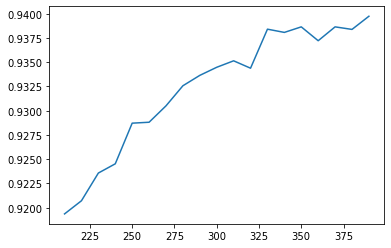

In [34]:
#======【TIME WARNING: 5 mins】======#
 
%matplotlib inline
import matplotlib.pyplot as plt
 
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

# P值 挑选

In [35]:
chivalue, pvalues_chi = chi2(X_fsvar,y)

In [36]:
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [39]:
 
pvalues_chi
 
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
 
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
pvalues_chi
k

392

In [42]:
from sklearn.feature_selection import f_classif
 
F, pvalues_f = f_classif(X_fsvar,y)
 
# F

In [50]:
k = F.shape[0] - (pvalues_f > 0.05).sum()
# pvalues_f
k
 
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

392

# 互信息法 

In [51]:
from sklearn.feature_selection import mutual_info_classif as MIC
 
result = MIC(X_fsvar,y)
result

array([0.06638564, 0.0858452 , 0.09811576, 0.11116207, 0.11396612,
       0.1120129 , 0.08494709, 0.05570843, 0.06754346, 0.10467451,
       0.1223466 , 0.14058248, 0.16120042, 0.16501645, 0.15197567,
       0.12803189, 0.09125137, 0.06672545, 0.03933628, 0.02536785,
       0.06401079, 0.09751297, 0.12234084, 0.15313663, 0.17661136,
       0.20200656, 0.22326896, 0.23034473, 0.21687523, 0.18192003,
       0.13587529, 0.10055129, 0.07559978, 0.06010532, 0.0525832 ,
       0.03037641, 0.05912318, 0.08098295, 0.0942996 , 0.12406192,
       0.13293442, 0.1498499 , 0.1630532 , 0.17811072, 0.18578472,
       0.16783947, 0.15208862, 0.1287828 , 0.11330135, 0.09223497,
       0.07760784, 0.06820033, 0.0661675 , 0.05010851, 0.0612733 ,
       0.07900675, 0.09262453, 0.09435742, 0.10226107, 0.10633019,
       0.10980752, 0.11329749, 0.12047962, 0.12045803, 0.10676644,
       0.11488519, 0.11566288, 0.10317974, 0.10122234, 0.08255529,
       0.06764029, 0.0402553 , 0.04859236, 0.0662788 , 0.07825

In [52]:
 
k = result.shape[0] - sum(result <= 0)
k 
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

392

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
 
RFC_ = RFC(n_estimators =10,random_state=0)
 
X_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(X,y)
 
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_
 
X_embedded.shape

(42000, 279)

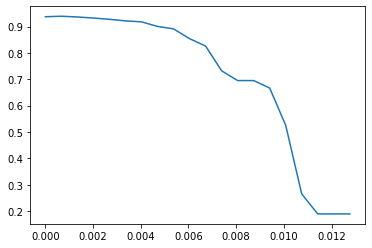

In [55]:
 
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值
 
#======【TIME WARNING：10 mins】======#
 
import numpy as np
import matplotlib.pyplot as plt
 
RFC_.fit(X,y).feature_importances_
 
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
 
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

# np.linspace(a,b,c)  ab之间选c个数字 

In [56]:
X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y)
X_embedded.shape
 
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9391190476190475

In [ ]:
#======【TIME WARNING：10 mins】======#
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)

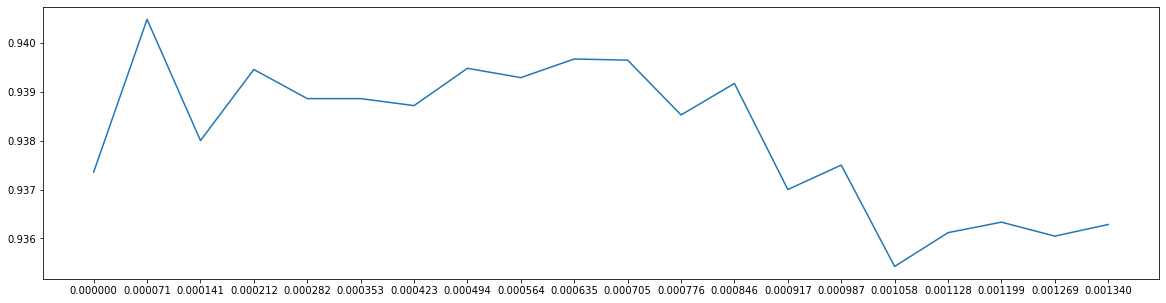

In [61]:
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0.00134,0,20))
plt.show()

In [69]:
max(score2)

0.9404761904761905

In [58]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)
X_embedded.shape
 
cross_val_score(RFC_,X_embedded,y,cv=5).mean()
 
#=====【TIME WARNING：2 min】=====#
#我们可能已经找到了现有模型下的最佳结果，如果我们调整一下随机森林的参数呢？
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.9634285714285715

In [59]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)
 
selector.support_.sum()#340
 
selector.ranking_
 
X_wrapper = selector.transform(X)
 
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9379761904761905

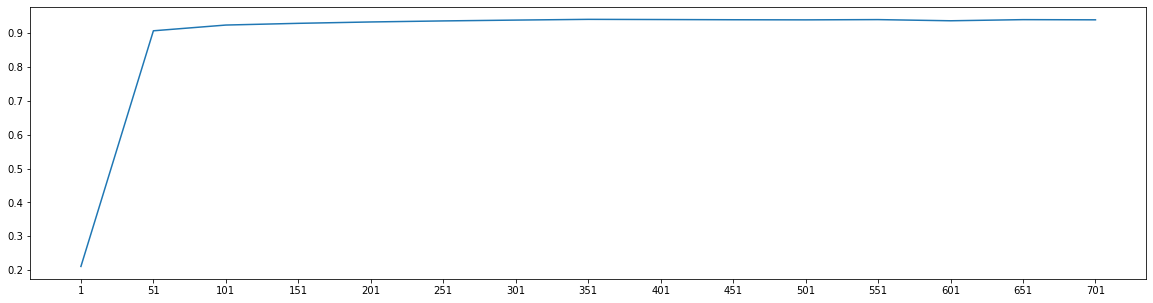

In [60]:
#======【TIME WARNING: 15 mins】======#
 
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()